# Clustering des données de plantes

### Abstract: Data has been extracted from the USDA plants database. It contains all plants (species and genera) in the database and the states of USA and Canada where they occur.

Number of Instances: 22632
Number of Attributes: 70

In [2]:
import pandas as pd # Analyse et manipulation de données (utilisation des Panda DataFrame) https://pandas.pydata.org/docs/user_guide/index.html and/or https://sparkbyexamples.com/python-pandas-tutorial-for-beginners/ 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Visualization de données
#import hvplot.pandas # Plots interactifs https://hvplot.holoviz.org/

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
import io
warnings.filterwarnings('ignore')

%matplotlib inline

Le dataset originel est "plants.data"

In [4]:
datafile = "plants.data"
type(datafile)

str

### Chargement des données brutes

In [5]:
# Charger les données du fichier 'datafile'
rawdatas = np.genfromtxt(
    datafile,
    delimiter='\n',
    # usecols=range(0,70),
    filling_values=0,
    skip_header=0, # on garde la première ligne
    dtype="str"
)

In [9]:
# Using Pandas DataFrame
pd.DataFrame(rawdatas).info()

# Using ndarrays
print('rawdatas :', type(rawdatas), rawdatas.shape, '\n', rawdatas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34781 entries, 0 to 34780
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       34781 non-null  object
dtypes: object(1)
memory usage: 271.9+ KB
rawdatas : <class 'numpy.ndarray'> (34781,) 
 ['abelia,fl,nc' 'abelia x grandiflora,fl,nc'
 'abelmoschus,ct,dc,fl,hi,il,ky,la,md,mi,ms,nc,sc,va,pr,vi' ...
 'zygophlebia sectifrons,pr'
 'zygophyllum,ca,co,id,ks,mt,nv,nm,ny,pa,tx,wa'
 'zygophyllum fabago,ca,co,id,ks,mt,nv,nm,ny,pa,tx,wa']


### Mise en forme

Création de la structure de données désirée (type objet)

In [13]:
nanmatrix = np.full([len(rawdatas), 70], '', dtype=object)
print('nanmatrix :', type(nanmatrix), nanmatrix.shape, nanmatrix.dtype, '\n', nanmatrix)

nanmatrix : <class 'numpy.ndarray'> (34781, 70) object 
 [['' '' '' ... '' '' '']
 ['' '' '' ... '' '' '']
 ['' '' '' ... '' '' '']
 ...
 ['' '' '' ... '' '' '']
 ['' '' '' ... '' '' '']
 ['' '' '' ... '' '' '']]


Remplissage de la matrice data et consultation des données

In [15]:
import re
data = nanmatrix

for i, rawdata in enumerate(rawdatas):
    sdatas = re.split(',',rawdata)
    for j, sdata in enumerate(sdatas):
        data[i,j] = sdata

In [23]:
# Infos using Pandas DataFrame
print(pd.DataFrame(data))

                                    0   1   2   3   4   5   6   7   8   9   \
0                               abelia  fl  nc                               
1                 abelia x grandiflora  fl  nc                               
2                          abelmoschus  ct  dc  fl  hi  il  ky  la  md  mi   
3               abelmoschus esculentus  ct  dc  fl  il  ky  la  md  mi  ms   
4                abelmoschus moschatus  hi  pr                               
...                                ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
34776  zuckia brandegeei var. plummeri  co  nm  ut  wy                       
34777                      zygophlebia  pr                                   
34778           zygophlebia sectifrons  pr                                   
34779                      zygophyllum  ca  co  id  ks  mt  nv  nm  ny  pa   
34780               zygophyllum fabago  ca  co  id  ks  mt  nv  nm  ny  pa   

       ... 60 61 62 63 64 65 66 67 68 69  
0      ...          

In [24]:
pd.DataFrame(data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34781 entries, 0 to 34780
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       34781 non-null  object
 1   1       34781 non-null  object
 2   2       34781 non-null  object
 3   3       34781 non-null  object
 4   4       34781 non-null  object
 5   5       34781 non-null  object
 6   6       34781 non-null  object
 7   7       34781 non-null  object
 8   8       34781 non-null  object
 9   9       34781 non-null  object
 10  10      34781 non-null  object
 11  11      34781 non-null  object
 12  12      34781 non-null  object
 13  13      34781 non-null  object
 14  14      34781 non-null  object
 15  15      34781 non-null  object
 16  16      34781 non-null  object
 17  17      34781 non-null  object
 18  18      34781 non-null  object
 19  19      34781 non-null  object
 20  20      34781 non-null  object
 21  21      34781 non-null  object
 22  22      34781 non-null

### Inventaire et compte du nombre de valeurs par état (state)

In [26]:
states = np.unique(data[:,1:], return_counts=True)
print('states :', type(states), len(states), '\n', states)

states : <class 'tuple'> 2 
 (array(['', 'ab', 'ak', 'al', 'ar', 'az', 'bc', 'ca', 'co', 'ct', 'dc',
       'de', 'dengl', 'fl', 'fraspm', 'ga', 'gl', 'hi', 'ia', 'id', 'il',
       'in', 'ks', 'ky', 'la', 'lb', 'ma', 'mb', 'md', 'me', 'mi', 'mn',
       'mo', 'ms', 'mt', 'nb', 'nc', 'nd', 'ne', 'nf', 'nh', 'nj', 'nm',
       'ns', 'nt', 'nu', 'nv', 'ny', 'oh', 'ok', 'on', 'or', 'pa', 'pe',
       'pr', 'qc', 'ri', 'sc', 'sd', 'sk', 'tn', 'tx', 'ut', 'va', 'vi',
       'vt', 'wa', 'wi', 'wv', 'wy', 'yt'], dtype=object), array([2097775,    3408,    2969,    5702,    4610,    6778,    4875,
         11676,    5465,    4391,    3080,    3630,     479,    6621,
          1210,    5942,     561,    3804,    3652,    5129,    5167,
          4440,    3869,    4555,    5154,    1433,    4963,    3023,
          5108,    3969,    4734,    3929,    4638,    4815,    4800,
          2856,    5926,    2682,    3281,    2188,    3635,    4822,
          6403,    2844,    2024,     979,    5670,   

Calculons les proportions de chaque state hormis ""

In [32]:
props = np.empty(0)
for i, state in enumerate(states[0][1:]):
    props = np.append(props,states[1][i+1] / 34781)

print('props :', type(props), '\n taille:', len(props), '\n', props)

props : <class 'numpy.ndarray'> 
 taille: 70 
 [0.09798453 0.0853627  0.16394008 0.13254363 0.19487651 0.14016273
 0.33570053 0.15712602 0.12624709 0.0885541  0.10436733 0.01377189
 0.19036255 0.03478911 0.1708404  0.0161295  0.10937006 0.10499986
 0.14746557 0.14855812 0.1276559  0.11123889 0.13096231 0.14818435
 0.04120066 0.14269285 0.08691527 0.14686179 0.11411403 0.1361088
 0.11296397 0.13334867 0.13843765 0.13800638 0.0821138  0.17038038
 0.07711107 0.09433311 0.06290791 0.10451108 0.13863891 0.18409476
 0.08176878 0.05819269 0.02814755 0.16302004 0.16598143 0.13720135
 0.13372243 0.14571174 0.20206435 0.15738478 0.0529312  0.13746011
 0.12282568 0.09473563 0.15617722 0.09157299 0.08182628 0.14088152
 0.24389753 0.17368678 0.1621     0.06282166 0.10675369 0.16256002
 0.1242345  0.1167879  0.13541876 0.06037779]


### Comme le tableau data obtenu n'est pas uniforme, Multi Label Binarizer MLB permet de le transformer

Obtention de la matrice bindata (de type Tableau Disjonctif Complet TDC)

In [34]:
# from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=False)

bindata = mlb.fit_transform(data[:,1:])

mlb.classes_

array(['', 'ab', 'ak', 'al', 'ar', 'az', 'bc', 'ca', 'co', 'ct', 'dc',
       'de', 'dengl', 'fl', 'fraspm', 'ga', 'gl', 'hi', 'ia', 'id', 'il',
       'in', 'ks', 'ky', 'la', 'lb', 'ma', 'mb', 'md', 'me', 'mi', 'mn',
       'mo', 'ms', 'mt', 'nb', 'nc', 'nd', 'ne', 'nf', 'nh', 'nj', 'nm',
       'ns', 'nt', 'nu', 'nv', 'ny', 'oh', 'ok', 'on', 'or', 'pa', 'pe',
       'pr', 'qc', 'ri', 'sc', 'sd', 'sk', 'tn', 'tx', 'ut', 'va', 'vi',
       'vt', 'wa', 'wi', 'wv', 'wy', 'yt'], dtype=object)

La classe vide '' ne contient quasi que des 1 car présente presque partout:

In [35]:
np.unique_counts(bindata[:,0])

UniqueCountsResult(values=array([0, 1]), counts=array([    4, 34777]))

On va ignorer la classe vide '' qui ne contient pas d'informations pertinentes

In [36]:
bindata = bindata[:,1:]

Détermination de la structure de la matrice obtenue

In [37]:
counts = np.unique_counts(bindata[:,0])
print(counts)

N = counts[1][1] # Nombre de 1
ratio = counts[1][0] / (N + counts[1][0]) * 100 # ratio nombre de zéros / total
ratio

UniqueCountsResult(values=array([0, 1]), counts=array([31373,  3408]))


np.float64(90.2015468215405)

La matrice contient plus de 90% de zéros et peut a priori être considérée comme "sparse"

Consultation de la matrice bindata

In [39]:
print('bindata :', type(bindata), bindata.shape, bindata.dtype, '\n', bindata[:14,:]) #.toarray()) si CSR sparse Matrix

bindata : <class 'numpy.ndarray'> (34781, 70) int64 
 [[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1
  0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  

Calcul des vecteurs sommes lignes et colonnes

In [40]:
r = np.sum(bindata, axis=1) # vector of the row totals
print('r :', type(r), r.shape, r.dtype, '\n', r)

c = np.sum(bindata, axis=0) # vector of the columns totals
print('c :', type(c), c.shape, c.dtype, '\n', c)

r : <class 'numpy.ndarray'> (34781,) int64 
 [ 2  2 15 ...  1 11 11]
c : <class 'numpy.ndarray'> (70,) int64 
 [ 3408  2969  5702  4610  6778  4875 11676  5465  4391  3080  3630   479
  6621  1210  5942   561  3804  3652  5129  5167  4440  3869  4555  5154
  1433  4963  3023  5108  3969  4734  3929  4638  4815  4800  2856  5926
  2682  3281  2188  3635  4822  6403  2844  2024   979  5670  5773  4772
  4651  5068  7028  5474  1841  4781  4272  3295  5432  3185  2846  4900
  8483  6041  5638  2185  3713  5654  4321  4062  4710  2100]


### Transformation du tableau de données bindata

Pondération et centrage des valeurs

In [70]:
wbindata = bindata.astype(float)
# wbindata = np.copy(bindata)

for i, prop in enumerate(props):
    wbindata[:,i] = wbindata[:,i] / c[i] #(wbindata[:,i] - prop) / c[i]
    # wbindata[:,i] = (wbindata[:,i] / prop) #- 1

print('wbindata :', type(wbindata), wbindata.shape, wbindata.dtype, '\n', wbindata[:1,:])

wbindata : <class 'numpy.ndarray'> (34781, 70) float64 
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00015103 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.00016875
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]


### Pipelines

Réduction de dimension ici avec 2 composantes principales par la méthode Truncated SVD (adaptée au matrices sparse)

In [71]:
# Normalisation et réduction de dimension
preprocessor = Pipeline(
    [
        # Choisir ici PCA ou TruncatedSVD:

        ("svd", TruncatedSVD(n_components=3, n_iter=7, random_state=42))
        # ("pca", PCA(n_components=3, random_state=42))
    ]
)

K-Means avec un nombre de clusters par défaut

In [72]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [73]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [74]:
# pipe.fit(M)
pipe.fit(wbindata)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('svd',
                                  TruncatedSVD(n_components=3, n_iter=7,
                                               random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=4, n_init=50,
                                         random_state=42))]))])

In [75]:
# Vérifie le résultat de la réduction de dimension (Transformation en 2D)

# preprocessed_data = pipe["preprocessor"].transform(M)
preprocessed_data = pipe["preprocessor"].transform(wbindata)
print('preprocessed_data :', type(preprocessed_data), preprocessed_data.shape, preprocessed_data.dtype, '\n', preprocessed_data[:5,:])

preprocessed_data : <class 'numpy.ndarray'> (34781, 3) float64 
 [[ 2.31618263e-05 -2.96295580e-05  6.88470768e-06]
 [ 2.31618263e-05 -2.96295580e-05  6.88470768e-06]
 [ 2.79689700e-04 -2.98245557e-04  6.50539050e-05]
 [ 2.69844090e-04 -2.91375046e-04  6.54574828e-05]
 [ 1.43690778e-05 -1.35059902e-05  1.24065224e-06]]


In [76]:
# Autre façon de faire ?
ppp = preprocessor.transform(wbindata)
ppp[:5,]

array([[ 2.31618263e-05, -2.96295580e-05,  6.88470768e-06],
       [ 2.31618263e-05, -2.96295580e-05,  6.88470768e-06],
       [ 2.79689700e-04, -2.98245557e-04,  6.50539050e-05],
       [ 2.69844090e-04, -2.91375046e-04,  6.54574828e-05],
       [ 1.43690778e-05, -1.35059902e-05,  1.24065224e-06]])

In [77]:
# Vérifie le résultat du clustering

n_clusters = clusterer["kmeans"].n_clusters # n_c = pipe["clusterer"]["kmeans"].n_clusters

print("nombre de clusters :", n_clusters)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print(predicted_labels.shape)
print(predicted_labels[:5])

nombre de clusters : 4
(34781,)
[0 0 0 0 0]


In [78]:
silhouette_score(preprocessed_data, predicted_labels)

np.float64(0.8000728227112552)

### Visualization

In [79]:
# Construit le data frame avec la projection des données en 2D, leurs clusters prédits, et leurs étiquettes de référence
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(wbindata)[:,:2],
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

pcadf.head()

,component_1,component_2,predicted_cluster
0,0.000023,-0.000030,0
1,0.000023,-0.000030,0
2,0.000280,-0.000298,0
3,0.000270,-0.000291,0
4,0.000014,-0.000014,0


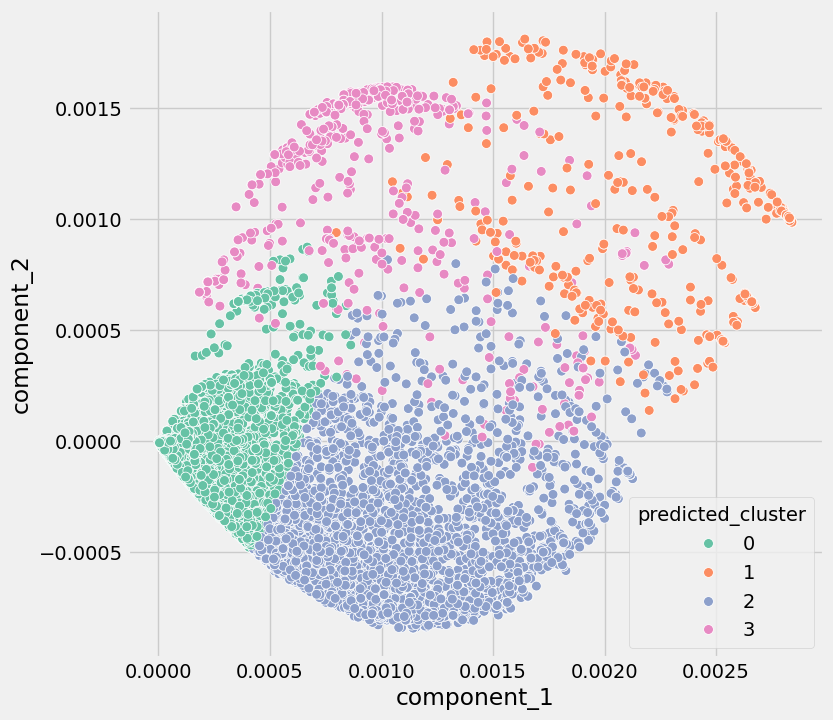

In [80]:
# Plot
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    data=pcadf,
    x = "component_1",
    y = "component_2",
    s=50,
    hue="predicted_cluster",
    # style="true_label",
    palette="Set2",
)

explained variance: [1.96446013e-07 8.35190633e-08 5.77676677e-08 3.49364773e-08
 2.54887340e-08 1.70042862e-08 1.60710517e-08 1.24392616e-08
 1.10844447e-08 9.58102066e-09]
ppp : <class 'sklearn.decomposition._truncated_svd.TruncatedSVD'>
components : <class 'numpy.ndarray'> (10, 70) [0.12125705 0.11295847 0.07827621 0.09452011 0.05067854 0.09822539
 0.03675724 0.07956816 0.12849256 0.12980353 0.12478946 0.26333778
 0.05336967 0.20602621 0.07826689 0.10289649 0.0374527  0.13358529
 0.0824071  0.11429309 0.122843   0.10719112 0.10897421 0.07756096
 0.18006608 0.11871512 0.14993781 0.10898874 0.13896412 0.12662525
 0.13854814 0.10636503 0.0842716  0.09451514 0.16114155 0.08948948
 0.14249428 0.12319702 0.1689211  0.14531671 0.11808173 0.0615759
 0.15987832 0.1447395  0.16107388 0.05683726 0.11139092 0.12004359
 0.08858035 0.12513818 0.06408621 0.11128714 0.18410223 0.0216267
 0.13564188 0.14448296 0.08321186 0.12990432 0.14307231 0.10286235
 0.05121268 0.06457626 0.10059119 0.02384317 0

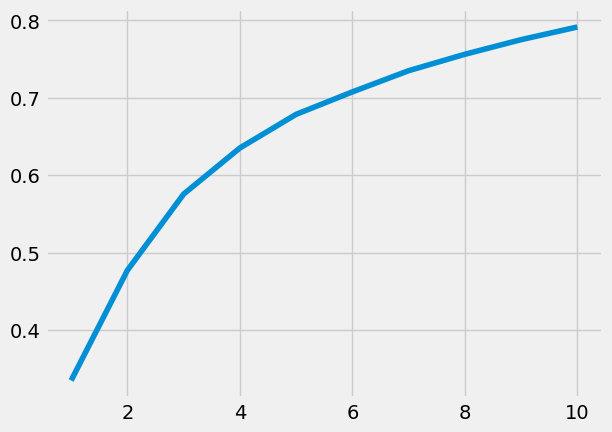

In [81]:
# Récupére et visualise la variance expliquée cumulée par les 20 premières composantes
m = 10
pipe["preprocessor"]["svd"].n_components = m
# pipe["preprocessor"]["pca"].n_components = m

pipe.fit(wbindata)

ppp = pipe["preprocessor"]["svd"]
# ppp = pipe["preprocessor"]["pca"]

print('explained variance:', pipe["preprocessor"]["svd"].explained_variance_)
# print('explained variance:', pipe["preprocessor"]["pca"].explained_variance_)

print('ppp :', type(ppp)) #, 'SVD solver :', ppp.svd_solver)
print('components :', type(ppp.components_), ppp.components_.shape, ppp.components_[0,:])
print('singular vals :', ppp.singular_values_)
print(ppp.n_components, 'sum :', sum(ppp.explained_variance_ratio_), ppp.explained_variance_ratio_)

plt.plot(
    range(1, m+1),
    np.cumsum(pipe["preprocessor"]["svd"].explained_variance_ratio_))
    # np.cumsum(pipe["preprocessor"]["pca"].explained_variance_ratio_))


In [84]:
# Listes vides pour stocker les métriques de qualité 
# Silhouette
silhouette_scores = []

for n in range(2, 7):
    # On fait varier le nombre de clusters,
    # en laissant les autres paramètres inchangées, e.g. nombre de composantes principales

    # pipe["preprocessor"]["pca"].n_components = 3
    pipe["preprocessor"]["svd"].n_components = 3
    pipe["clusterer"]["kmeans"].n_clusters = n

    pipe.fit(wbindata)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(wbindata),
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Ajoute les métriques aux listes correspondantes
    silhouette_scores.append(silhouette_coef)

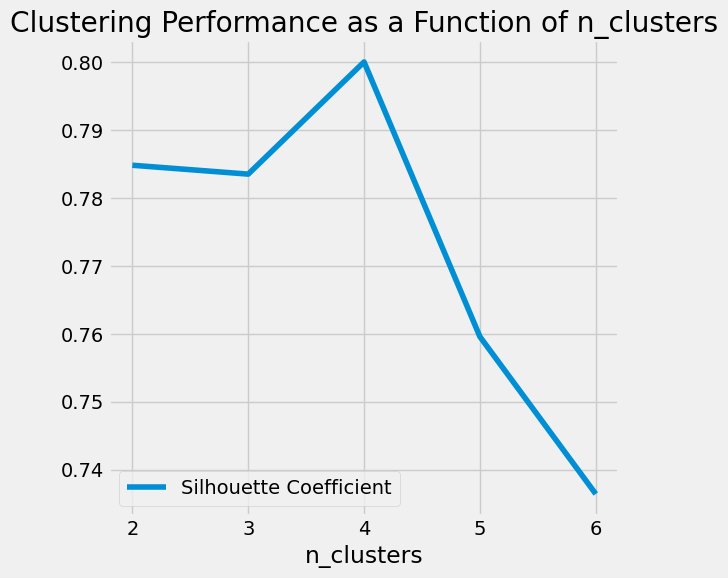

In [85]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 7),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)

plt.xlabel("n_clusters")
plt.legend()
plt.title("Clustering Performance as a Function of n_clusters")
plt.tight_layout()
plt.show()

Pour différentes valeurs de n_components utilisées lors de la réduction de dimension, il semble qu'un nombre de 4 clusters présente les résultats optimaux